In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import mpld3
mpld3.enable_notebook()

In [3]:
import sys
import numpy as np 
import random
import math
import tensorflow as tf
from collections import OrderedDict
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
sys.path.append("../Utils/")

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 3

In [10]:
import seaborn as sns
sns.set_style("whitegrid")

(50, 2) (50, 2)


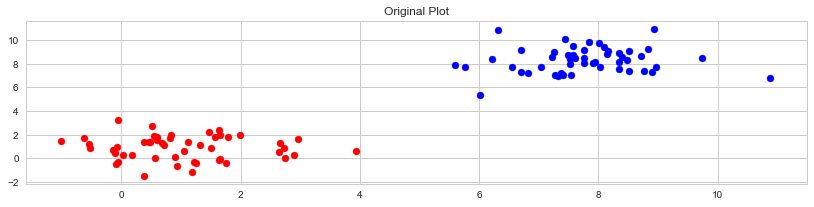

In [11]:
x1 = np.random.multivariate_normal(mean=(1.0, 1.0), cov=[[1.0, 0.0], [0.0, 1.0]] ,size=50)
y1 = [0 for x in xrange(x1.shape[0])]

x2 = np.random.multivariate_normal(mean=(8.0, 8.0), cov=[[1.0, 0.0], [0.0, 1.0]] ,size=50)
y2 = [1 for x in xrange(x2.shape[0])]

print x1.shape, x2.shape

plt.scatter(x1[:, 0], x1[:, 1], color='r')
plt.scatter(x2[:, 0], x2[:, 1], color='b')
plt.title("Original Plot")
plt.show()

In [12]:
X = np.vstack((x1, x2))
Y = np.hstack((y1, y2))

In [13]:
X.shape, Y.shape

((100, 2), (100,))

In [15]:
sys.path.append('../../tSNE/tsne_python')

In [16]:
from tsne import tsne

In [88]:
def plot_tSNE(data, labels, perplexity=None, iterations=5000, size=6, experiment=None):
    color_set = ['b', 'g', 'r', 'o', 'm']
    if experiment == 'perplexity':
        if perplexity == None:
            return 

        unique_labels = set(labels)
        Z = OrderedDict()
        perplexity = sorted(perplexity)
        Z[0] = data

        for perp in perplexity:
            Z[perp] = tsne(X=data, no_dims=2, initial_dims=data.shape[0], perplexity=perp, iterations=iterations)

        f, ax = plt.subplots(1, len(perplexity) + 1)

        for pl_, data in zip(ax, Z.items()):
            i = 0 
            if data[0] == 0:
                if len(unique_labels) > 1:
                    for label_ in unique_labels:
                        pl_.scatter(data[1][labels==label_][:, 0], data[1][labels==label_][:, 1], \
                                    color=color_set[i])
                        i += 1
                else:
                    pl_.scatter(data[1][:, 0], data[1][:, 1])
                pl_.set_title('Original Data')
            else:
                if len(unique_labels) > 1:
                    for label_ in unique_labels:
                        pl_.scatter(data[1][labels==label_][:, 0], data[1][labels==label_][:, 1], \
                                   color=color_set[i])
                        i += 1
                else:
                    pl_.scatter(data[1][:, 0], data[1][:, 1])

                pl_.set_title('Perplexity = %s'  % data[0])
                
    elif experiment == 'step_size':
        if iterations == None:
            return 

        unique_labels = set(labels)
        Z = OrderedDict()
        iterations = sorted(iterations)
        Z[0] = data

        for iter_ in iterations:
            Z[iter_] = tsne(X=data, no_dims=2, initial_dims=data.shape[0], perplexity=perplexity, iterations=iter_)
            
        f, ax = plt.subplots(1, len(iterations) + 1)

        for pl_, data in zip(ax, Z.items()):
            if data[0] == 0:
                if len(unique_labels) > 1:
                    for label_ in unique_labels:
                        pl_.scatter(data[1][labels==label_][:, 0], data[1][labels==label_][:, 1])
                else:
                    pl_.scatter(data[1][:, 0], data[1][:, 1])
            else:
                if len(unique_labels) > 1:
                    for label_ in unique_labels:
                        pl_.scatter(data[1][labels==label_][:, 0], data[1][labels==label_][:, 1])
                else:
                    pl_.scatter(data[1][:, 0], data[1][:, 1])

### Hyper parameters really matter

##### Playing with perplexity 

* With perplexity 2, local variation dominate 
        * more reasoning

* Image with perplexity 100, shows a pitfall of the algorithms. i.e. perplexity value should be below the number of points for the algorithm to work  

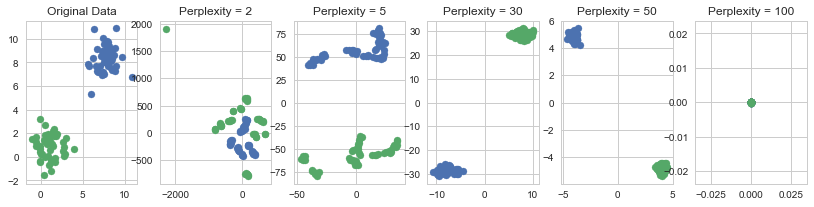

In [28]:
plot_tSNE(X, Y, perplexity=[2, 5, 30, 50, 100])

##### Playing with the number of steps 

* There is no fixed number of iteration, different datasets may require different number of iterations. 
* Generally no_of iterations = 5000 is enough to reach a point of global stability.

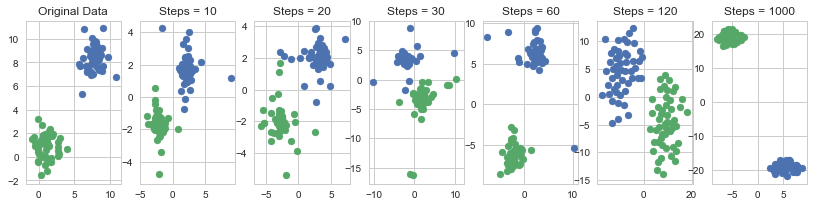

In [34]:
plot_tSNE(X, Y, perplexity=30.0, iterations=[10, 20, 30, 60, 120, 1000], experiment='step_size')

### Cluster size mean nothing 

(50, 2) (50, 2)


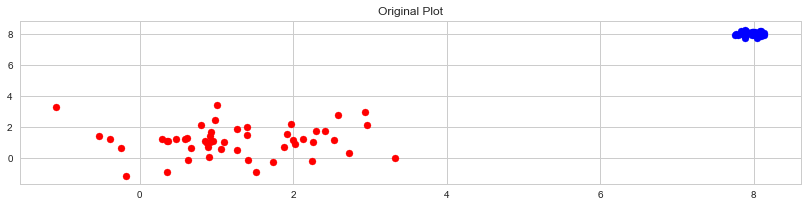

In [37]:
x1 = np.random.multivariate_normal(mean=(1.0, 1.0), cov=[[1.0, 0.0], [0.0, 1.0]] ,size=50)
y1 = [0 for x in xrange(x1.shape[0])]

x2 = np.random.multivariate_normal(mean=(8.0, 8.0), cov=[[0.01, 0.0], [0.0, 0.01]] ,size=50)
y2 = [1 for x in xrange(x2.shape[0])]

print x1.shape, x2.shape

plt.scatter(x1[:, 0], x1[:, 1], color='r')
plt.scatter(x2[:, 0], x2[:, 1], color='b')
plt.title("Original Plot")
plt.show()

In [38]:
Xcluster = np.vstack((x1, x2))
Ycluster = np.hstack((y1, y2))

##### Cluster shape with different perplexities 

* Dataset with two cluster with different standard deviations. 
* t-SNE adapts its notion of distance to regional density variation in the dataset.
* Expands dense clusters and contracts sparse clusters, evening out cluster sizes.
* Bottom line is, that we should not infer relative sizes of the cluster in tSNE plots. 

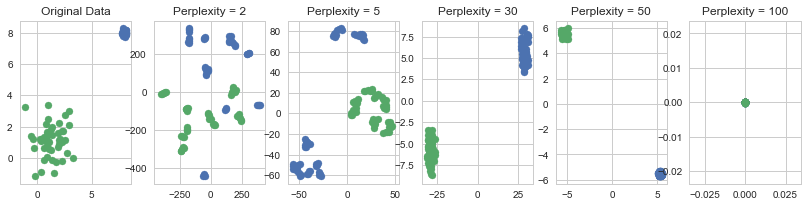

In [46]:
plot_tSNE(Xcluster, Ycluster, perplexity=[2, 5, 30, 50, 100], iterations=5000, experiment='perplexity')

### Distance between clusters might not mean anything

(50, 2) (50, 2)


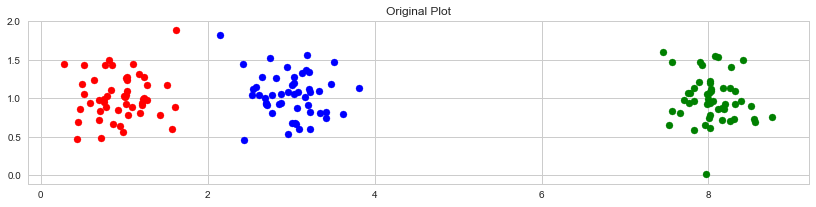

In [99]:
x1 = np.random.multivariate_normal(mean=(1.0, 1.0), cov=[[0.1, 0.0], [0.0, 0.1]] ,size=50)
y1 = [0 for x in xrange(x1.shape[0])]

x2 = np.random.multivariate_normal(mean=(3.0, 1.0), cov=[[0.1, 0.0], [0.0, 0.1]] ,size=50)
y2 = [1 for x in xrange(x2.shape[0])]

x3 = np.random.multivariate_normal(mean=(8.0, 1.0), cov=[[0.1, 0.0], [0.0, 0.1]] ,size=50)
y3 = [2 for x in xrange(x2.shape[0])]

print x1.shape, x2.shape

plt.scatter(x1[:, 0], x1[:, 1], color='r')
plt.scatter(x2[:, 0], x2[:, 1], color='b')
plt.scatter(x3[:, 0], x3[:, 1], color='g')
plt.title("Original Plot")
plt.show()

In [100]:
Xdistance = np.vstack((x1, x2, x3))
Ydistance = np.hstack((y1, y2, y3))

##### Distance with different perplexities

* At perplexity, the tSNE plot captures some notion of distance global geometry 
* For lower perplexity, clusters look equidistant. 
* At 100, one of clusters sizes dropper. 
* Can we perplexity=50 is a good choice for the hyper parameter. ?

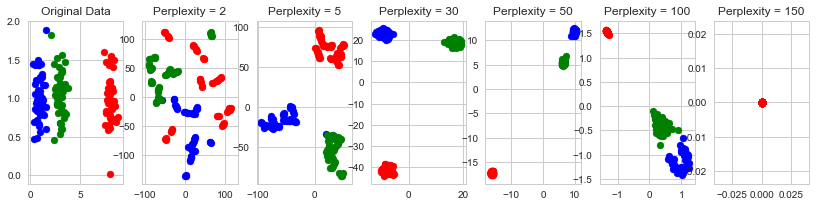

In [101]:
plot_tSNE(Xdistance, Ydistance, perplexity=[2, 5, 30, 50, 100, 150], iterations=5000, experiment='perplexity')

(200, 2) (200, 2)


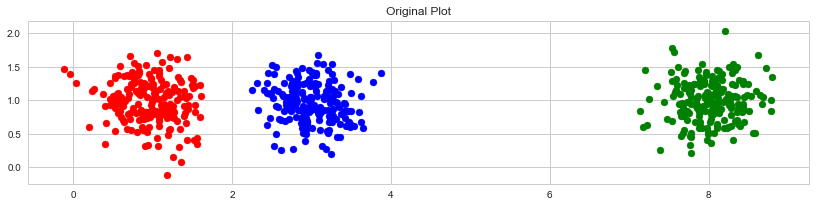

In [56]:
x1 = np.random.multivariate_normal(mean=(1.0, 1.0), cov=[[0.1, 0.0], [0.0, 0.1]] ,size=200)
y1 = [0 for x in xrange(x1.shape[0])]

x2 = np.random.multivariate_normal(mean=(3.0, 1.0), cov=[[0.1, 0.0], [0.0, 0.1]] ,size=200)
y2 = [1 for x in xrange(x2.shape[0])]

x3 = np.random.multivariate_normal(mean=(8.0, 1.0), cov=[[0.1, 0.0], [0.0, 0.1]] ,size=200)
y3 = [2 for x in xrange(x2.shape[0])]

print x1.shape, x2.shape

plt.scatter(x1[:, 0], x1[:, 1], color='r')
plt.scatter(x2[:, 0], x2[:, 1], color='b')
plt.scatter(x3[:, 0], x3[:, 1], color='g')
plt.title("Original Plot")
plt.show()

In [57]:
Xdistance = np.vstack((x1, x2, x3))
Ydistance = np.hstack((y1, y2, y3))

* With 200 points, even at perplexity 50 the plot is not capturing the geometrical properties. 
* The basic idea is, well seperated clusters may not mean anything in tSNE.

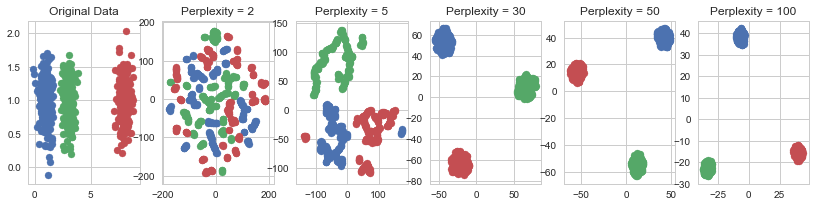

In [58]:
plot_tSNE(Xdistance, Ydistance, perplexity=[2, 5, 30, 50, 100], iterations=5000, experiment='perplexity')

### Random noise doesn’t always look random.

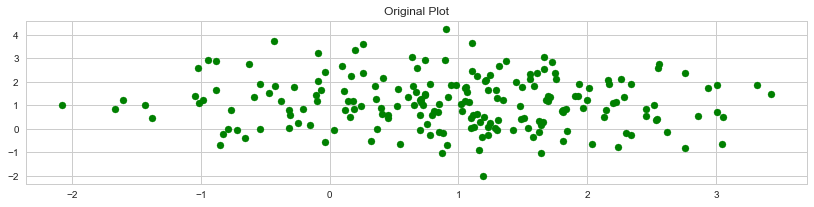

In [67]:
x1 = np.random.multivariate_normal(mean=(1.0, 1.0), cov=[[1.0, 0.0], [0.0, 1.0]] ,size=200)
y1 = [0 for x in xrange(x1.shape[0])]

plt.scatter(x1[:, 0], x1[:, 1], color='g')
plt.title("Original Plot")
plt.show()

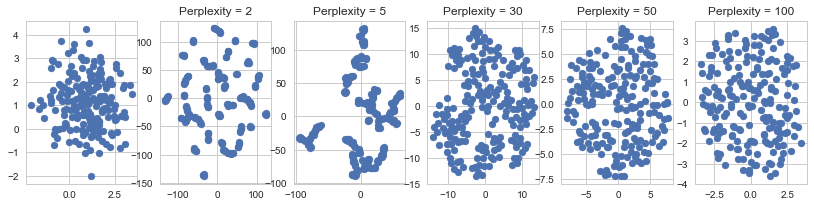

In [70]:
plot_tSNE(x1, y1, perplexity=[2, 5, 30, 50, 100], iterations=5000, experiment='perplexity')

### You can see some shapes sometimes.

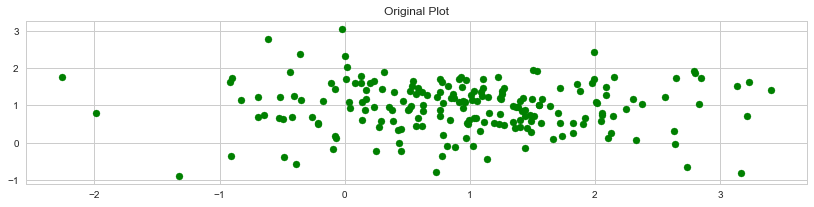

In [71]:
x1 = np.random.multivariate_normal(mean=(1.0, 1.0), cov=[[1.0, 0.0], [0.0, 0.5]] ,size=200)
y1 = [0 for x in xrange(x1.shape[0])]

plt.scatter(x1[:, 0], x1[:, 1], color='g')
plt.title("Original Plot")
plt.show()

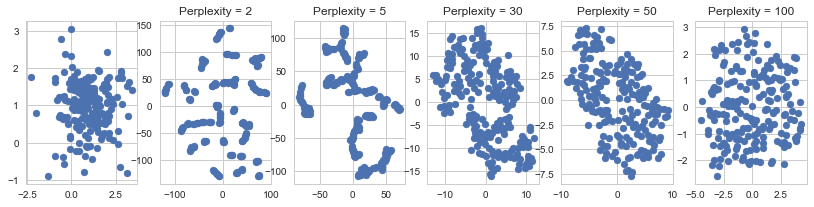

In [72]:
plot_tSNE(x1, y1, perplexity=[2, 5, 30, 50, 100], iterations=5000, experiment='perplexity')

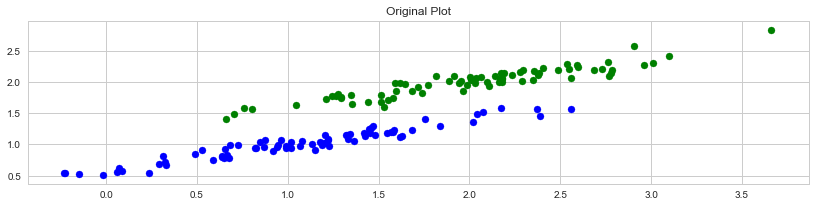

In [96]:
x1 = np.random.multivariate_normal(mean=(1.0, 1.0), cov=[[0.5, 0.2], [0.01, 0.01]] ,size=75)
y1 = [0 for x in xrange(x1.shape[0])]

x2 = np.random.multivariate_normal(mean=(2.0, 2.0), cov=[[0.5, 0.2], [0.01, 0.01]] ,size=75)
y2 = [1 for x in xrange(x1.shape[0])]

plt.scatter(x1[:, 0], x1[:, 1], color='b')
plt.scatter(x2[:, 0], x2[:, 1], color='g')
plt.title("Original Plot")
plt.show()

In [97]:
Xparallel = np.vstack((x1, x2))
Yparallel = np.hstack((y1, y2))

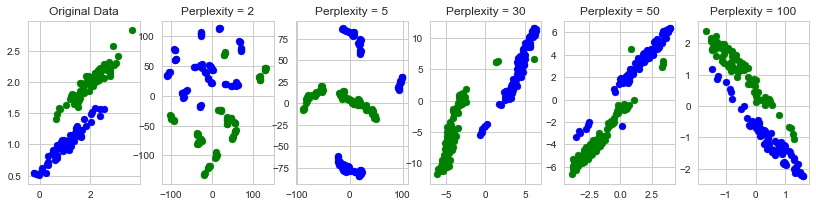

In [98]:
plot_tSNE(Xparallel, Yparallel, perplexity=[2, 5, 30, 50, 100], iterations=5000, experiment='perplexity')